<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame20250528_scikit_learn_%E7%B7%A8%E7%A2%BCEncode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 編碼 Encode

## 載入資料並且訓練

In [8]:
# 若在一些不同環境，以下幾個可能需要安裝
! pip install pandas
! pip install openpyxl
! pip install scikit-learn

In [2]:
#載入資料
import pandas as pd
data = pd.read_excel("../content/R公司_人員資料.xlsx")
data.head()

,員工編號(EmployeeNumber),性別(Gender),年齡(Age),是否為成年人(Over18),婚姻狀態(MaritalStatus),通勤距離(DistanceFromHome),教育程度(Education),教育專業領域(EducationField),部門(Department),職位名稱(JobRole),...,股票選擇權等級(StockOptionLevel),績效評估(PerformanceRating),出差頻率(BusinessTravel),去年訓練時間(TrainingTimesLastYear),工作滿意度(JobSatisfaction),工作環境滿意度(EnvironmentSatisfaction),工作投入(JobInvolvement),工作生活平衡(WorkLifeBalance),人際關係滿意度(RelationshipSatisfaction),離職(Attrition)
0,1,Female,41,Y,Single,1,2,Life Sciences,Sales,Sales Executive,...,0,3,Travel_Rarely,0,4,2,3,1,1,Yes
1,2,Male,49,Y,Married,8,1,Life Sciences,Research & Development,Research Scientist,...,1,4,Travel_Frequently,3,2,3,2,3,4,No
2,4,Male,37,Y,Single,2,2,Other,Research & Development,Laboratory Technician,...,0,3,Travel_Rarely,3,3,4,2,3,2,Yes
3,5,Female,33,Y,Married,3,4,Life Sciences,Research & Development,Research Scientist,...,0,3,Travel_Frequently,3,3,4,3,3,3,No
4,7,Male,27,Y,Married,2,1,Medical,Research & Development,Laboratory Technician,...,1,3,Travel_Rarely,3,2,1,3,3,4,No


In [4]:
#查看有那些欄位
data.columns

Index(['員工編號(EmployeeNumber)', '性別(Gender)', '年齡(Age)', '是否為成年人(Over18)',
       '婚姻狀態(MaritalStatus)', '通勤距離(DistanceFromHome)', '教育程度(Education)',
       '教育專業領域(EducationField)', '部門(Department)', '職位名稱(JobRole)',
       '職位等級(JobLevel)', '在該公司工作總年資(YearsAtCompany)',
       '在該職位工作年資(YearsInCurrentRole)', '在該職等工作年資(YearsSinceLastPromotion)',
       '與現任管理者工作年資(YearsWithCurrManager)', '總工作年資(TotalWorkingYears)',
       '過去工作公司家數(NumCompaniesWorked)', '每日工資額(DailyRate)',
       '每小時工資額(HourlyRate)', '月收入(MonthlyIncome)', '月費率(MonthlyRate)',
       '標準工作時間(StandardHours)', '加班(OverTime)', '調薪百分比(PercentSalaryHike)',
       '股票選擇權等級(StockOptionLevel)', '績效評估(PerformanceRating)',
       '出差頻率(BusinessTravel)', '去年訓練時間(TrainingTimesLastYear)',
       '工作滿意度(JobSatisfaction)', '工作環境滿意度(EnvironmentSatisfaction)',
       '工作投入(JobInvolvement)', '工作生活平衡(WorkLifeBalance)',
       '人際關係滿意度(RelationshipSatisfaction)', '離職(Attrition)'],
      dtype='object')

In [5]:
#決定輸入的欄位名稱，跟要預測的欄位名稱
input_field_name = ['性別(Gender)', '年齡(Age)', '是否為成年人(Over18)',
       '婚姻狀態(MaritalStatus)', '通勤距離(DistanceFromHome)', '教育程度(Education)',
       '教育專業領域(EducationField)', '部門(Department)', '職位名稱(JobRole)',
       '職位等級(JobLevel)', '在該公司工作總年資(YearsAtCompany)',
       '在該職位工作年資(YearsInCurrentRole)', '在該職等工作年資(YearsSinceLastPromotion)',
       '與現任管理者工作年資(YearsWithCurrManager)', '總工作年資(TotalWorkingYears)',
       '過去工作公司家數(NumCompaniesWorked)', '每日工資額(DailyRate)',
       '每小時工資額(HourlyRate)', '月收入(MonthlyIncome)', '月費率(MonthlyRate)',
       '標準工作時間(StandardHours)', '加班(OverTime)', '調薪百分比(PercentSalaryHike)',
       '股票選擇權等級(StockOptionLevel)', '績效評估(PerformanceRating)',
       '出差頻率(BusinessTravel)', '去年訓練時間(TrainingTimesLastYear)',
       '工作滿意度(JobSatisfaction)', '工作環境滿意度(EnvironmentSatisfaction)',
       '工作投入(JobInvolvement)', '工作生活平衡(WorkLifeBalance)',
       '人際關係滿意度(RelationshipSatisfaction)']
output_field_name = '離職(Attrition)'

In [6]:
# 將資料分成輸入與輸出兩部分
X = data[input_field_name]
y = data[output_field_name]

In [22]:
# 使用MLP來訓練模型
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X, y)

ValueError: could not convert string to float: 'Female'

↑ 為何上面會出現錯誤？

Ans：因為「Female」欄位是字串不是數值，此時需要幫他編碼

## Label Encode

### 使用 map() 來編碼

In [9]:
# 查看一下 "性別(Gender)" 這個欄位有多少不同的值
data['性別(Gender)'].value_counts()

,count
性別(Gender),
Male,882
Female,588


In [10]:
# 將 'Male' 編碼成0, 'Femake' 編碼成1
data['性別(Gender)'].map({'Male': 0, 'Female': 1})

,性別(Gender)
0,1
1,0
2,0
3,1
4,0
...,...
1465,0
1466,0
1467,0
1468,0


### 使用 LabelEncoder 進行編碼

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 建立 LabelEncoder
le.fit(data['性別(Gender)'])

# 若使用LabelEncoder編碼，他是自動按順序編、亦即無法自訂，map()則是自訂

LabelEncoder()

In [12]:
# 進行編碼轉換
le.transform(data['性別(Gender)'])

array([0, 1, 1, ..., 1, 1, 1])

In [13]:
# 也可以把上面兩個步驟合併在一起
le.fit_transform(data['性別(Gender)'])

array([0, 1, 1, ..., 1, 1, 1])

In [16]:
#也可以進行反轉換
temp = le.fit_transform(data['性別(Gender)'])
le.inverse_transform(temp)

array(['Female', 'Male', 'Male', ..., 'Male', 'Male', 'Male'],
      dtype=object)

In [17]:
# 查詢 LabelEncoder 的編碼對應
le.classes_

array(['Female', 'Male'], dtype=object)

In [18]:
# 將編碼後的資料存回原資料
data['性別_Label'] = le.fit_transform(data['性別(Gender)'])
data['性別_Label']

,性別_Label
0,0
1,1
2,1
3,0
4,1
...,...
1465,1
1466,1
1467,1
1468,1


### 問題：map() 跟 LabelEncoder 那個方法比較好？理由？

Ans：map()雖然較麻煩一些，但自訂性較好

### 問題：使用 Label 來進行編碼有什麼缺點？
Ans：是自動依順序編碼，雖然方便一些，但自訂性較差

```
提醒：若將欄位(尤其是該分類有多個欄位)編碼後，會因數值化而有大小先後順序，這對有些資料來說並不是合理的情況
```

```
labelEncode的缺點：
* 當測試資料中出現訓練資料中沒有的值，會無法編碼。
* 解決方法：
    分資料的時候，就要避免這樣的情形
    一旦出現這種情形，該筆測試資料放棄
    主動使用.map()，將0用來表示「其他」

onehotEncode的缺點：
* 欄位會膨脹
* 好處是可以接受未知的值 (所有相關欄位的值都是0)
* 資料稀疏

pd.get_dummies：
* 好處：簡單、方便
* 缺點：
    測試資料中，沒有任何一筆資料出現過訓練資料中的值，產生的欄位會缺少。
    在kaggle中，都是全部的資料先用get_dummies()轉換後才分訓練組跟測試組，所以不會發生這樣的情形。但是這樣做不好。
```

## One Hot Encode

```
提醒：One Hot Encode使用上會將欄位擴展膨脹，要留意是否會導致資料過大而有處理速度上的問題
```

In [19]:
# 查看一下 "部門(Department)" 這個欄位有多少不同的值
data['部門(Department)'].value_counts()

,count
部門(Department),
Research & Development,961
Sales,446
Human Resources,63


## 寫程式來編碼

In [24]:
# 方法一
data['部門(Department)'].map({'Research & Development': 1, 'Sales': 0, 'Human Resources':0})

# 這個方法以這個例子要寫三次、再存起來

,部門(Department)
0,0
1,1
2,1
3,1
4,1
...,...
1465,1
1466,1
1467,1
1468,0


In [21]:
# 方法二
(data['部門(Department)'] == 'Research & Development').astype('int64')

,部門(Department)
0,0
1,1
2,1
3,1
4,1
...,...
1465,1
1466,1
1467,1
1468,0


In [23]:
# 將成立新的欄位來表示One Hot Encode的資料
data['部門_RD'] = (data['部門(Department)'] == 'Research & Development').astype('int64')
data['部門_Sales'] = (data['部門(Department)'] == 'Sales').astype('int64')
data['部門_HR'] = (data['部門(Department)'] == 'Human Resources').astype('int64')

data[['部門_RD', '部門_Sales', '部門_HR']]

,部門_RD,部門_Sales,部門_HR
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1465,1,0,0
1466,1,0,0
1467,1,0,0
1468,0,1,0


In [ ]:
#　### 這個是講師本身習慣、推薦的方法 ###

# 寫成 function
def one_hot_encode(data, field_name):
    field_value = data[field_name].value_counts().index
    new_field_name = []
    for value in field_value:
        fn = field_name+"_"+value
        data[fn] = (data[field_name] == value).astype('int64')
        new_field_name.append(fn)
    return new_field_name

fns = one_hot_encode(data, '部門(Department)')
data[fns]

,部門(Department)_Research & Development,部門(Department)_Sales,部門(Department)_Human Resources
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1465,1,0,0
1466,1,0,0
1467,1,0,0
1468,0,1,0


## 使用 OneHotEncoder 來進行編碼
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [25]:
# 進行編碼
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse=False 表示結果是密集矩陣
one_hot_encoded = encoder.fit_transform(data[['部門(Department)']]) #<-注意 這邊要兩層 [],因為OneHotEncoder只能接受二維的資料
# 此處可同時指定多個類別，但不建議，因為會變得複雜不便處理
one_hot_encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [26]:
# 對應的類別名稱
encoder.categories_

[array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)]

In [27]:
# 將資料存回data
data['部門_HR'] = one_hot_encoded[:,0]
data['部門_RD'] = one_hot_encoded[:,1]
data['部門_Sales'] = one_hot_encoded[:,2]
data[['部門_RD', '部門_Sales', '部門_HR']]

,部門_RD,部門_Sales,部門_HR
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1465,1.0,0.0,0.0
1466,1.0,0.0,0.0
1467,1.0,0.0,0.0
1468,0.0,1.0,0.0


In [28]:
encoder = OneHotEncoder(sparse_output=False)  # sparse=False 表示結果是密集矩陣
one_hot_encoded = encoder.fit_transform(data[['部門(Department)']]) #<-注意 這邊要兩層 [],因為OneHotEncoder只能接受二維的資料
one_hot_encoded

# 寫成 function
def one_hot_encode2(data, field_name):
    encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = encoder.fit_transform(data[[field_name]]).astype('int64')
    field_value = data[field_name].value_counts().index
    new_field_name = []
    for value, n in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
        fn = field_name+"_"+value
        data[fn] = one_hot_encoded[:,n]
        new_field_name.append(fn)
    return new_field_name

fns = one_hot_encode2(data, '部門(Department)')
data[fns]

,部門(Department)_Human Resources,部門(Department)_Research & Development,部門(Department)_Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,0,1


## get_dummies

```
提醒：get_dummies 沒辦法存
```

In [29]:
# get_dummies會使用onehot encode的方式來編碼
pd.get_dummies(data['部門(Department)'])

,Human Resources,Research & Development,Sales
0,False,False,True
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
1465,False,True,False
1466,False,True,False
1467,False,True,False
1468,False,False,True


In [30]:
# 可以一次轉碼多個欄位
pd.get_dummies(data[['部門(Department)','性別(Gender)']])

,部門(Department)_Human Resources,部門(Department)_Research & Development,部門(Department)_Sales,性別(Gender)_Female,性別(Gender)_Male
0,False,False,True,True,False
1,False,True,False,False,True
2,False,True,False,False,True
3,False,True,False,True,False
4,False,True,False,False,True
...,...,...,...,...,...
1465,False,True,False,False,True
1466,False,True,False,False,True
1467,False,True,False,False,True
1468,False,False,True,False,True


In [31]:
#會自動判斷數值型的欄位不進行轉碼
pd.get_dummies(data[['部門(Department)','性別(Gender)','職位等級(JobLevel)']])

,職位等級(JobLevel),部門(Department)_Human Resources,部門(Department)_Research & Development,部門(Department)_Sales,性別(Gender)_Female,性別(Gender)_Male
0,2,False,False,True,True,False
1,2,False,True,False,False,True
2,1,False,True,False,False,True
3,1,False,True,False,True,False
4,1,False,True,False,False,True
...,...,...,...,...,...,...
1465,2,False,True,False,False,True
1466,3,False,True,False,False,True
1467,2,False,True,False,False,True
1468,2,False,False,True,False,True


get_dummies雖然簡單，但是無法儲存訓練資料的編碼方式，因此之後拿到的測試資料有可能無法編出一樣的碼。因為測試資料非常有可能不會包含訓練資料中所有的欄位值，編出來的碼會缺部分欄位。

## 練習

In [37]:
# 編碼 職位名稱(JobRole)
data['職位名稱(JobRole)'].value_counts()

,count
職位名稱(JobRole),
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


In [39]:

# 方法一
data['職位名稱(JobRole)'].value_counts()
dt = {
    'Sales Executive': 0,
    'Research Scientist': 1,
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
}

data['職位名稱(JobRole)'].map(dt)

,職位名稱(JobRole)
0,0.0
1,1.0
2,2.0
3,1.0
4,2.0
...,...
1465,2.0
1466,4.0
1467,3.0
1468,0.0


In [38]:
# 方法二
le = LabelEncoder()
le.fit_transform(data['職位名稱(JobRole)'])

array([7, 6, 2, ..., 4, 7, 2])

In [40]:
# 方法三
pd.get_dummies(data['職位名稱(JobRole)'])

,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1465,False,False,True,False,False,False,False,False,False
1466,True,False,False,False,False,False,False,False,False
1467,False,False,False,False,True,False,False,False,False
1468,False,False,False,False,False,False,False,True,False


In [41]:
# 方法四 (((建議使用這種)))
def one_hot_encode(data, field_name):
    field_value = data[field_name].value_counts().index
    new_field_name = []
    for value in field_value:
        fn = field_name+"_"+value
        data[fn] = (data[field_name] == value).astype('int64')
        new_field_name.append(fn)
    return new_field_name

fns = one_hot_encode(data, '職位名稱(JobRole)')
data[fns]

,職位名稱(JobRole)_Sales Executive,職位名稱(JobRole)_Research Scientist,職位名稱(JobRole)_Laboratory Technician,職位名稱(JobRole)_Manufacturing Director,職位名稱(JobRole)_Healthcare Representative,職位名稱(JobRole)_Manager,職位名稱(JobRole)_Sales Representative,職位名稱(JobRole)_Research Director,職位名稱(JobRole)_Human Resources
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1465,0,0,1,0,0,0,0,0,0
1466,0,0,0,0,1,0,0,0,0
1467,0,0,0,1,0,0,0,0,0
1468,1,0,0,0,0,0,0,0,0


In [53]:
# 編碼 加班(OverTime)
data['加班(OverTime)'].value_counts()
print(data['加班(OverTime)'].value_counts())

data['加班(OverTime)'].map({'Yes': 1, 'No': 0})

加班(OverTime)
No     1054
Yes     416
Name: count, dtype: int64


,加班(OverTime)
0,1
1,0
2,1
3,1
4,0
...,...
1465,0
1466,0
1467,1
1468,0


In [51]:
# 編碼 婚姻狀態(MaritalStatus)
data['婚姻狀態(MaritalStatus)'].value_counts()
print(data['婚姻狀態(MaritalStatus)'].value_counts())

def one_hot_encode(data, field_name):
    field_value = data[field_name].value_counts().index
    new_field_name = []
    for value in field_value:
        fn = field_name+"_"+value
        data[fn] = (data[field_name] == value).astype('int64')
        new_field_name.append(fn)
    return new_field_name

fns = one_hot_encode(data, '婚姻狀態(MaritalStatus)')
data[fns]

婚姻狀態(MaritalStatus)
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


,婚姻狀態(MaritalStatus)_Married,婚姻狀態(MaritalStatus)_Single,婚姻狀態(MaritalStatus)_Divorced
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1465,1,0,0
1466,1,0,0
1467,1,0,0
1468,1,0,0


In [55]:
# 另解(因其狀態剛好可以對應人數，若自行指定符合概念的數字較佳)
data['婚姻狀態(MaritalStatus)'].value_counts()
data['婚姻狀態(MaritalStatus)'].map({"Single":0, "Divorced":1, "Married":2})

,婚姻狀態(MaritalStatus)
0,0
1,2
2,0
3,2
4,2
...,...
1465,2
1466,2
1467,2
1468,2


In [61]:
# 問題：
# '教育程度(Education)' 需要進行編碼嗎？
data['教育程度(Education)'].value_counts()

,count
教育程度(Education),
3,572
4,398
2,282
1,170
5,48


In [ ]:
# 問題：
# 如果有個資料有 '顏色' 這個欄位，要如何編碼比較好？

Ans：顏色的值很多時，可以將顏色轉成RGB三種值，填入三個欄位分別代表R G B
值少時，直接使用one hot encode


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 40801 (\N{CJK UNIFIED IDEOGRAPH-9F61}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 38626 (\N{CJK UNIFIED IDEOGRAPH-96E2}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 32887 (\N{CJK UNIFIED IDEOGRAPH-8077}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from fon

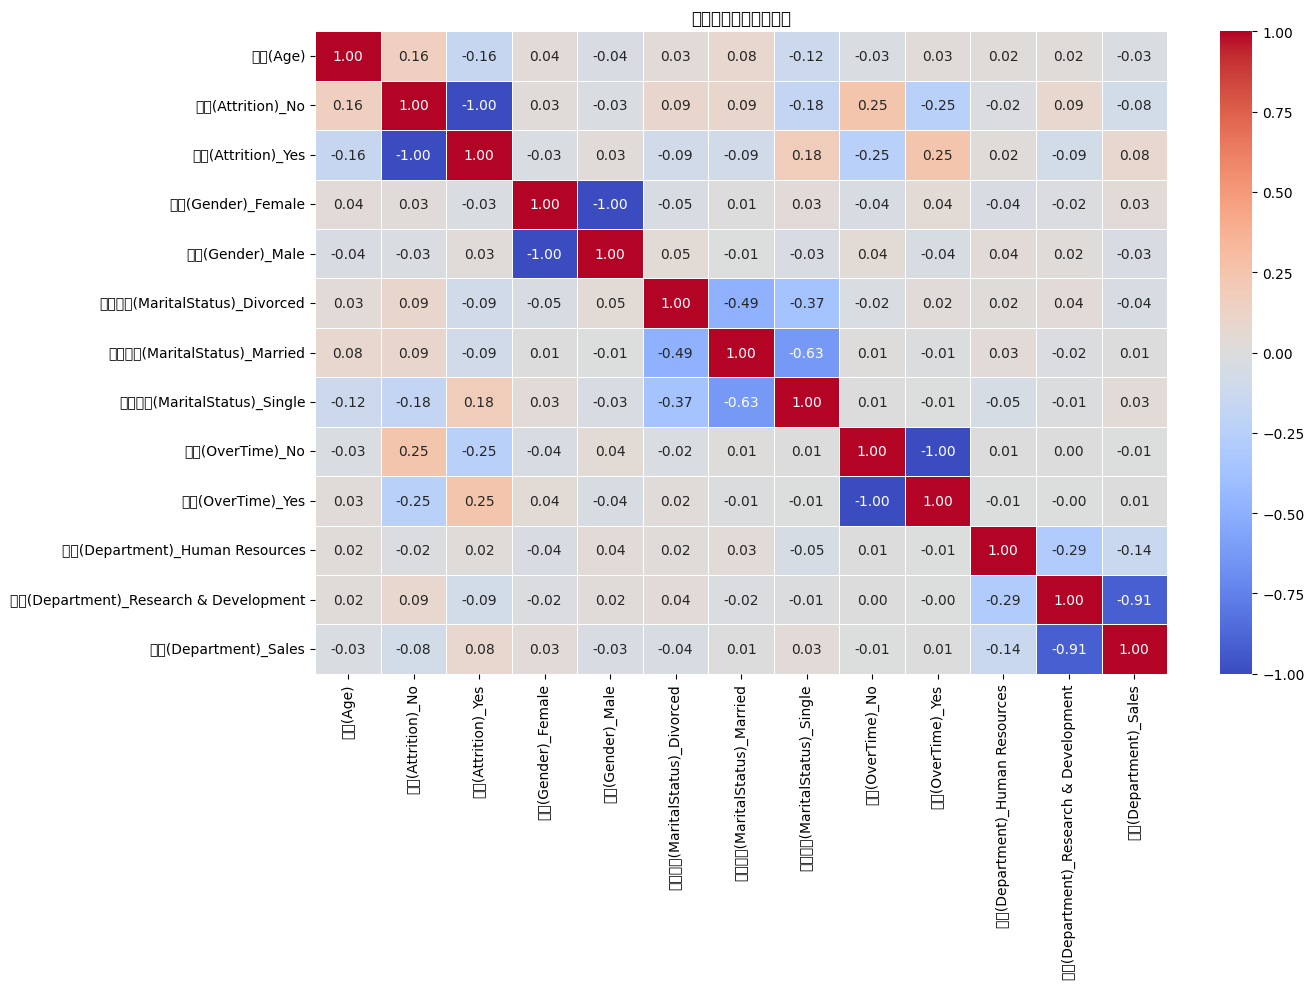

In [62]:
# 將 R公司_人員資料.xlsx 裡所有的欄位都進行適當的編碼，並進行相關性係數矩陣的計算，並畫出熱力圖 heatmap
# 這個整個畫出來會很大，取一部分示意

# ! pip install matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 將 R公司_人員資料.xlsx 裡所有的欄位都進行適當的編碼，並進行相關性係數矩陣的計算，並畫出熱力圖 heatmap
d2 = pd.get_dummies(data[['離職(Attrition)','性別(Gender)','年齡(Age)','婚姻狀態(MaritalStatus)','加班(OverTime)','部門(Department)']])

# 3. 計算相關係數矩陣
corr_matrix = d2.corr()

# 4. 畫出熱力圖，annot=True 表示在格子中顯示數值
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("相關性係數矩陣熱力圖")
plt.tight_layout()
plt.savefig('test.jpg')
plt.show()
